In [5]:
import matplotlib.pyplot as plt
import glob
import os,sys
import cv2

#Change brightness with 7 different percentages (increase and decrease). Test this on 10 images.

bright_list = [0.05,0.1,0.15,0.2,0.3,0.4,0.5]
count = 0

im_path = '/home/marmia/snic2020-6-41/Mariam/Mariam_Thesis/Results_Pipelines_Images/Binary_Classifier_data/All_images_r1r2_orig'
path_inc = '/home/marmia/snic2020-6-41/Mariam/Mariam_Thesis/Notebooks_Master/brightness_aug_inc'
path_dec = '/home/marmia/snic2020-6-41/Mariam/Mariam_Thesis/Notebooks_Master/brightness_aug_dec'


#take 10 images
im_list = glob.glob(im_path+'/*')[30:40]


#create the directories
if not os.path.exists(path_inc):
    os.makedirs(path_inc)
if not os.path.exists(path_dec):
    os.makedirs(path_dec)


for im in im_list:
    for i in bright_list:
        im_grey = cv2.imread(im,0)
        #save original image name
        imName_orig = im.split('/')[9]
        #multiply the image with the percentages in the list and start increasing the brightness
        im_mult = cv2.multiply(i,im_grey) # i can also say cv2.multiply((i+1),im_grey)
        #add them to the original image
        im_inc = cv2.add(im_mult,im_grey)
        #take the new image name
        imName_inc = imName_orig.replace('.png','_inc_'+str(int(i*100))+'.png')
        #save the new image name with brightness increase
        cv2.imwrite('{0}/{1}'.format(path_inc,imName_inc),im_inc)
        #save the original image
        cv2.imwrite('{0}/{1}'.format(path_inc,imName_orig),im_grey)
        #decrease brightness by percentages in bright_list
        im_mult_dec = cv2.multiply((1-i),im_grey)
        imName_dec = imName_orig.replace('.png','_dec_'+str(int(i*100))+'.png')    
        cv2.imwrite('{0}/{1}'.format(path_dec,imName_dec),im_mult_dec)
        cv2.imwrite('{0}/{1}'.format(path_dec,imName_orig),im_grey)
        
       

        
        
        
 
        

**Brightness is increased from left to right 5%,10%,15%,20%,30%,40%,50%. First image to the left is the original image**.

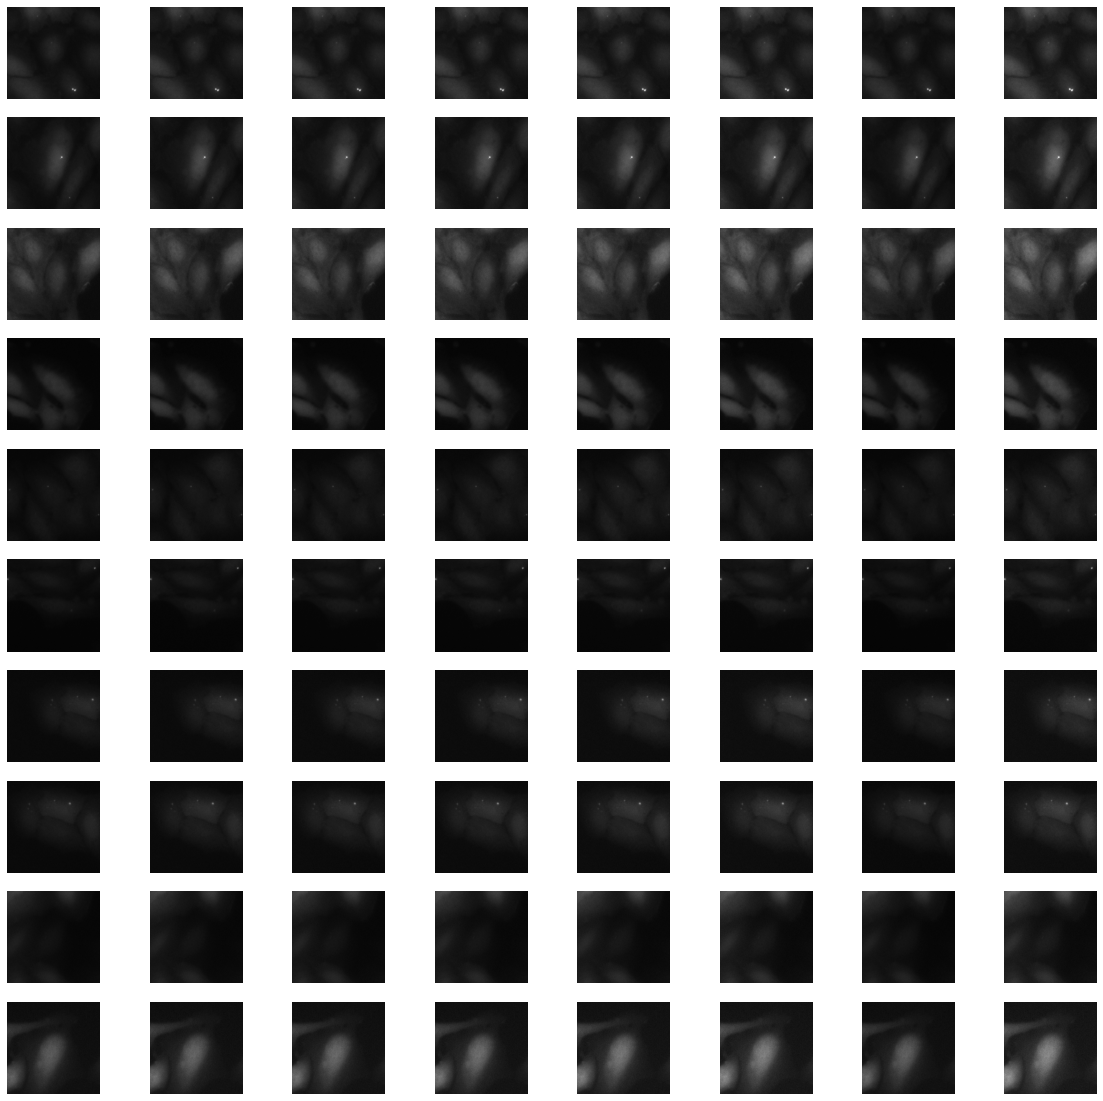

In [6]:
#plot each 8 images in a row
rows = 10

images = sorted(glob.glob(path_inc+'/*'))
plt.figure(figsize = (20,20))
for num, x in enumerate(images):
    img = cv2.imread(x)
    plt.subplot(rows,8,num+1)
    #plt.title(x.split('.')[0])
    plt.axis('off')
    plt.imshow(img)

**Brightness is decreased from left to right 5%,10%,15%,20%,30%,40%,50%. First image to the left is the original image**.

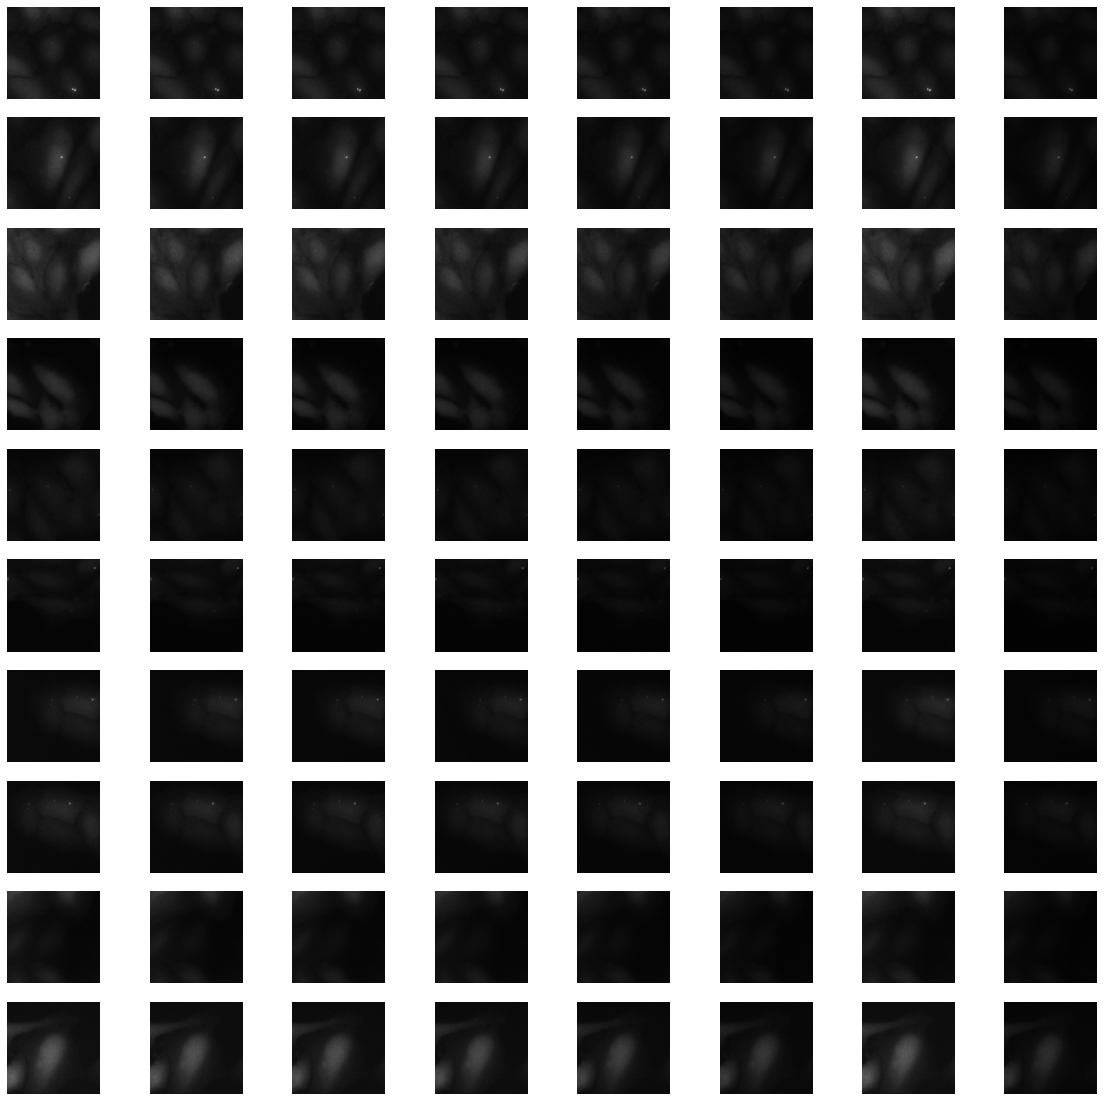

In [7]:
#plot each 8 images in a raw
rows = 10

images = sorted(glob.glob(path_dec+'/*'))
plt.figure(figsize = (20,20))
for num, x in enumerate(images):    
    img = cv2.imread(x)
    plt.subplot(rows,8,num+1)
    #plt.title(x.split('.')[0])
    plt.axis('off')
    plt.imshow(img)

